In [1]:
import numpy as np # linear algebra
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
#Dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
#CNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import warnings
import os
import shutil
from PIL import ImageFile
warnings.simplefilter('error', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

c:\users\3dsva-pc-1\.conda\envs\tensor2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\3dsva-pc-1\.conda\envs\tensor2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\3dsva-pc-1\.conda\envs\tensor2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, GlobalMaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [3]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
model=tf.keras.models.load_model('modelclass4.h5')

In [5]:
import glob,cv2
from PIL import Image
import numpy as np
class_names=[ "Amphibolis", "Background", "Halophila","Posidonia"]
images=glob.glob('testing/*.jpg')

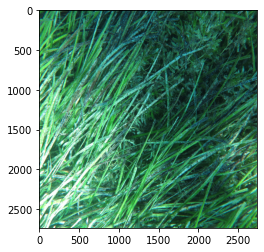

In [6]:
img_org=np.asarray(Image.open(images[11]))
plt.imshow(img_org)

In [7]:
k=0
for i in range(6):
    k+=1
    for j in range(6):
        save_path = "testing_patches/Image_"+str(k)+"_row_"+str(j)+"_column_"+str(i)+".jpg"    
        #cv2.imwrite(save_path, cv2.cvtColor(img_org[j*2000:(j+1)*2000,i*1500:(i+1)*1500,...],cv2.COLOR_RGB2BGR))
        Image.fromarray(img_org[j*456:(j+1)*456,i*456:(i+1)*456,...]).save(save_path)
        

In [8]:
images=glob.glob('testing_patches/*.jpg')

In [9]:
len(images)

36

In [10]:
def preprocess_image(img):
        if (img.shape[0] != 456 or img.shape[1] != 456):
            img = cv2.resize(img, (456, 456), interpolation=cv2.INTER_NEAREST)
        img = (img/127.5)
        img = img - 1
        img = np.expand_dims(img, axis=0)
        return img

path=glob.glob("testing_patches/*.jpg*")
import cv2
import glob
classes=[ "Amphibolis", "Background", "Halophila","Posidonia"]
for file in path:
    img=cv2.imread(file)
    pred = model.predict(preprocess_image(img))
    result = classes[np.argmax(pred)]
    print(file, result)
    cv2.imshow('Output result: {}'.format(result), img)    
    cv2.waitKey(1000)
    cv2.destroyAllWindows()

testing_patches\Image_1_row_0_column_0.jpg Posidonia
testing_patches\Image_1_row_1_column_0.jpg Posidonia
testing_patches\Image_1_row_2_column_0.jpg Posidonia
testing_patches\Image_1_row_3_column_0.jpg Posidonia
testing_patches\Image_1_row_4_column_0.jpg Posidonia
testing_patches\Image_1_row_5_column_0.jpg Posidonia
testing_patches\Image_2_row_0_column_1.jpg Posidonia
testing_patches\Image_2_row_1_column_1.jpg Posidonia
testing_patches\Image_2_row_2_column_1.jpg Posidonia
testing_patches\Image_2_row_3_column_1.jpg Posidonia
testing_patches\Image_2_row_4_column_1.jpg Posidonia
testing_patches\Image_2_row_5_column_1.jpg Posidonia
testing_patches\Image_3_row_0_column_2.jpg Posidonia
testing_patches\Image_3_row_1_column_2.jpg Posidonia
testing_patches\Image_3_row_2_column_2.jpg Posidonia
testing_patches\Image_3_row_3_column_2.jpg Posidonia
testing_patches\Image_3_row_4_column_2.jpg Posidonia
testing_patches\Image_3_row_5_column_2.jpg Posidonia
testing_patches\Image_4_row_0_column_3.jpg Amp

In [11]:
images=glob.glob('testing/*.jpg')

In [12]:
img_org=np.asarray(Image.open(images[11]))

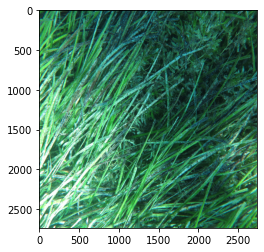

In [13]:
plt.imshow(img_org)

In [14]:
i=1
j=0
p=[]
for i in range(6):
    for j in range(6):
        p.append(img_org[j*456:(j+1)*456,i*456:(i+1)*456,...])
        


In [15]:
len(p)

36

In [16]:
p[0].shape

(456, 456, 3)

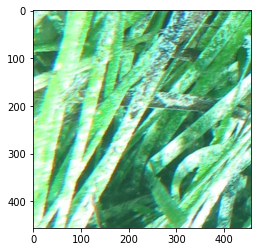

In [17]:
plt.imshow(p[3])

In [18]:
NUM_ROWS = 6
NUM_COLS = 6
NUM_CELLS = NUM_ROWS*NUM_COLS
CROP_SHAPE = (int(2736//NUM_ROWS), int(2736//NUM_COLS), 3)

In [19]:
#changing by me
inferences=[]
for img in p:
    #img=cv2.imread(file)
    #img=cv2.resize(img,(456,456))
    result = model.predict(preprocess_image(img))
    #result = classes[np.argmax(pred)]
    #img_t=np.expand_dims(img, axis=0)
    #prediction=model.predict(img_t)
    inferences.append( np.argmax(result, axis=1))
    #inferences.append( result[0].tolist().index(max(result[0])))
    
    
    

In [20]:
for img in p: 
    pred = model.predict(preprocess_image(img))
    result = classes[np.argmax(pred)]
    print(file, result)
    cv2.imshow('Output result: {}'.format(result), img)    
    cv2.waitKey(1000)
    cv2.destroyAllWindows()

testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Posidonia
testing_patches\Image_6_row_5_column_5.jpg Amp

In [112]:
len(inferences)

36

In [113]:
inferences

[array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64)]

In [23]:
#plt.imshow(p[35])

In [21]:
image_np = cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)

overlay = image_np.copy()
output = image_np.copy()

# how transparent the coloured mask should appear
alpha = 0.5

# These colours correspond to the matplotlib display!
red = (255, 0, 0)
blue = (0, 0, 255)
pink = (255,20,147)
orange = (255,165,0)

 # For each image, reset the cell index back to zero
index = 0

for y in range(0,NUM_ROWS):
    for x in range (0,NUM_COLS):
        x1 = x * CROP_SHAPE[1]
        y1 = y * CROP_SHAPE[0]

        x2 = (x+1) * CROP_SHAPE[1]
        y2 = (y+1) * CROP_SHAPE[0]

        if inferences[index] == 0:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), pink, -1) # Amphibolis
        elif inferences[index] == 1:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), red, -1) # Background
        elif inferences[index] == 2:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), blue, -1) # Halophila
        elif inferences[index] == 3:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), orange, -1) # Posidonia

        # Increment the cell index by 1 each time to obtain the next inference in the array
        index = index + 1
        
        


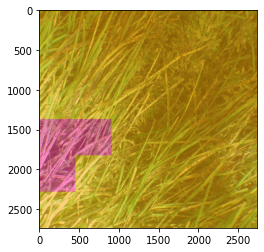

In [22]:
cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
plt.imshow(output)

In [23]:
save_path = "testing/Label_"+str(4)+"_no"+str(i)+".jpg"
cv2.imwrite(save_path, cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

True

In [24]:
images=glob.glob('testing/*.jpg')

In [25]:
img_org=np.asarray(Image.open(images[11]))
#plt.imshow(img_org)
k=0
p=[]
for i in range(6):
    k+=1
    for j in range(6):
        #save_path = "testing_patches/Image_"+str(k)+"_row_"+str(j)+"_column_"+str(i)+".jpg"    
        #cv2.imwrite(save_path, cv2.cvtColor(img_org[j*2000:(j+1)*2000,i*1500:(i+1)*1500,...],cv2.COLOR_RGB2BGR))
        p.append(Image.fromarray(img_org[j*456:(j+1)*456,i*456:(i+1)*456,...]))


In [26]:
len(p)

36

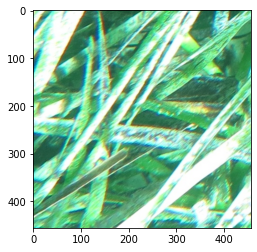

In [34]:
plt.imshow(p[4])

In [28]:
NUM_ROWS = 6
NUM_COLS = 6
NUM_CELLS = NUM_ROWS*NUM_COLS
CROP_SHAPE = (int(2736//NUM_ROWS), int(2736//NUM_COLS), 3)

In [29]:
#changing by me
inferences=[]
for img in p:
    #img=cv2.imread(img)
    #img=cv2.resize(img,(456,456))
    img=np.expand_dims(img, axis=0)
    result = model.predict(img)
    #result = classes[np.argmax(pred)]
    #img_t=np.expand_dims(img, axis=0)
    #prediction=model.predict(img_t)
    inferences.append( np.argmax(result, axis=1))
    #inferences.append( prediction[0].tolist().in
    

In [30]:
inferences

[array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64)]

In [31]:
image_np = cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)

overlay = image_np.copy()
output = image_np.copy()

# how transparent the coloured mask should appear
alpha = 0.5

# These colours correspond to the matplotlib display!
red = (255, 0, 0)
blue = (0, 0, 255)
pink = (255,20,147)
orange = (255,165,0)

 # For each image, reset the cell index back to zero
index = 0

for y in range(0,NUM_ROWS):
    for x in range (0,NUM_COLS):
        x1 = x * CROP_SHAPE[1]
        y1 = y * CROP_SHAPE[0]

        x2 = (x+1) * CROP_SHAPE[1]
        y2 = (y+1) * CROP_SHAPE[0]

        if inferences[index] == 0:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), pink, -1) # Amphibolis
        elif inferences[index] == 1:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), red, -1) # Background
        elif inferences[index] == 2:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), blue, -1) # Halophila
        elif inferences[index] == 3:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), orange, -1) # Posidonia

        # Increment the cell index by 1 each time to obtain the next inference in the array
        index = index + 1
        
        


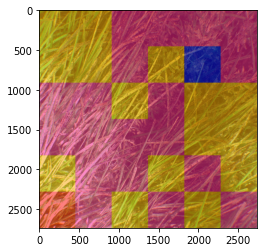

In [32]:
cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
plt.imshow(output)

In [35]:
img_org=np.asarray(Image.open(images[11]))

In [37]:
i=1
j=0
p=[]
for i in range(3):
    for j in range(3):
        p.append(img_org[j*912:(j+1)*912,i*912:(i+1)*912,...])
        


In [40]:
def preprocess_image(img):
        if (img.shape[0] != 456 or img.shape[1] != 456):
            img = cv2.resize(img, (456, 456), interpolation=cv2.INTER_NEAREST)
        img = (img/127.5)
        img = img - 1
        img = np.expand_dims(img, axis=0)
        return img

#changing by me
inferences=[]
for img in p:
    #img=cv2.imread(img)
    img=cv2.resize(img,(456,456))
    img=np.expand_dims(img, axis=0)
    result = model.predict(img)
    #result = classes[np.argmax(pred)]
    #img_t=np.expand_dims(img, axis=0)
    #prediction=model.predict(img_t)
    inferences.append( np.argmax(result, axis=1))
    #inferences.append( prediction[0].tolist().in
    


In [41]:
inferences

[array([3], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64),
 array([0], dtype=int64),
 array([3], dtype=int64)]

In [42]:
image_np = cv2.cvtColor(img_org,cv2.COLOR_BGR2RGB)

overlay = image_np.copy()
output = image_np.copy()

# how transparent the coloured mask should appear
alpha = 0.5

# These colours correspond to the matplotlib display!
red = (255, 0, 0)
blue = (0, 0, 255)
pink = (255,20,147)
orange = (255,165,0)

 # For each image, reset the cell index back to zero
index = 0

for y in range(0,NUM_ROWS):
    for x in range (0,NUM_COLS):
        x1 = x * CROP_SHAPE[1]
        y1 = y * CROP_SHAPE[0]

        x2 = (x+1) * CROP_SHAPE[1]
        y2 = (y+1) * CROP_SHAPE[0]

        if inferences[index] == 0:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), pink, -1) # Amphibolis
        elif inferences[index] == 1:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), red, -1) # Background
        elif inferences[index] == 2:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), blue, -1) # Halophila
        elif inferences[index] == 3:
            cv2.rectangle(overlay, (x1, y1), (x2, y2), orange, -1) # Posidonia

        # Increment the cell index by 1 each time to obtain the next inference in the array
        index = index + 1

cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
plt.imshow(output)

IndexError: list index out of range